In [95]:
!pip install requests beautifulsoup4

In [96]:
import requests
from bs4 import BeautifulSoup

def fetch_page(url):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        return soup
    else:
        return None

In [97]:
import re

def index_words(soup):
    index = {}
    words = re.findall(r'\w+', soup.get_text())
    for word in words:
        word = word.lower()
        if word in index:
            index[word] += 1
        else:
            index[word] = 1
    return index

In [98]:
def remove_stop_words(index):
    stop_words = {'a', 'an', 'the', 'and', 'or', 'in', 'on', 'at', 'to','all'}
    for stop_word in stop_words:
        if stop_word in index:
            del index[stop_word]
    return index

In [99]:
from nltk.stem import PorterStemmer

def apply_stemming(index):
    stemmer = PorterStemmer()
    stemmed_index = {}
    for word, count in index.items():
        stemmed_word = stemmer.stem(word)
        if stemmed_word in stemmed_index:
            stemmed_index[stemmed_word] += count
        else:
            stemmed_index[stemmed_word] = count
    return stemmed_index

In [100]:
def search(query, index):

    stemmer = PorterStemmer()
    query_words = re.findall(r'\w+', query.lower())
    results = {}
    for word in query_words:
        word = stemmer.stem(word)
        if word in index:
            results[word] = index[word]
    return results

In [101]:
def search_engine(url, query):
    soup = fetch_page(url)
    if soup is None:
        return None
    index = index_words(soup)
    index = remove_stop_words(index)
    index = apply_stemming(index)
    results = search(query, index)
    return results

In [102]:
!pip install firebase


In [103]:
from firebase import firebase
FBconn = firebase.FirebaseApplication('https://tut5cloud-default-rtdb.europe-west1.firebasedatabase.app',None)
url = 'https://cad.onshape.com/help/Content/Glossary/glossary.htm?tocpath=_____19'
query = {'point', 'dimension', 'studio', 'help', 'n/a', 'render', 'onshape', 'context', 'Add', 'Shortcut'}
for word in query:
  results = search_engine(url, word)
  print(results) ## load to firebase
  rank=1
  for word, count in results.items():
    rank = rank*1/count
  rank = 1-rank
  print(rank)
  result = FBconn.post('/Results/', results)
  print(result)


{'add': 26}
0.9615384615384616
{'name': '-O1Qt7sbgd-jmRrIJD_d'}
{'render': 159}
0.9937106918238994
{'name': '-O1Qt8O4fh3Sa1Xg2p7u'}
{'help': 13}
0.9230769230769231
{'name': '-O1Qt8k5kLLlw6dOqO3q'}
{'onshap': 98}
0.9897959183673469
{'name': '-O1Qt990t9d_24RsyR41'}
{'n': 505}
0.998019801980198
{'name': '-O1Qt9_Bix8cohtXcIYh'}
{'context': 676}
0.9985207100591716
{'name': '-O1Qt9tDf2kxdsHUIJPQ'}
{'shortcut': 631}
0.9984152139461173
{'name': '-O1QtA6oaaeUCy6-xF_J'}
{'dimens': 49}
0.9795918367346939
{'name': '-O1QtALZzo6xw_-ZAlLL'}
{'point': 74}
0.9864864864864865
{'name': '-O1QtA_YV8Rz-zYpNiOh'}
{'studio': 369}
0.997289972899729
{'name': '-O1QtApMgPEXwdu8xbq3'}


dict_values([{'add': 26}, {'render': 159}, {'help': 13}, {'onshap': 98}, {'n': 505}, {'context': 676}, {'shortcut': 631}, {'dimens': 49}, {'point': 74}, {'studio': 369}])


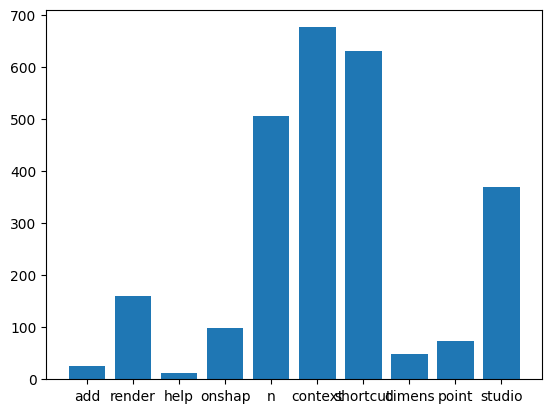

In [104]:
from firebase import firebase
import matplotlib.pyplot as plt

firebase = firebase.FirebaseApplication('https://tut5cloud-default-rtdb.europe-west1.firebasedatabase.app', None)
result = firebase.get('/Results/', None)
print(result.values())
dic = {}
for val in result.values():
  dic.update(val)
plt.bar(dic.keys(), dic.values())
plt.show()